In [117]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
from math import sqrt

In [2]:
data = pd.read_excel('Spotify Charts.xlsx')

In [3]:
data = data.drop(['Unnamed: 0', 'wrapperType', 'kind',  'trackId', 'trackName','collectionCensoredName',
       'trackCensoredName', 'collectionViewUrl', 'feedUrl', 'trackViewUrl',
       'artworkUrl30', 'artworkUrl60', 'artworkUrl100', 'collectionPrice',
       'trackPrice', 'trackRentalPrice', 'collectionHdPrice', 'trackHdPrice',
       'trackHdRentalPrice', 'trackExplicitness', 'country', 'currency', 'artworkUrl600',
       'artistId', 'artistViewUrl',  'collectionExplicitness', 'releaseDate'], axis=1)

In [5]:
data.columns

Index(['collectionId', 'artistName', 'collectionName', 'trackCount',
       'contentAdvisoryRating', 'primaryGenreName', 'Secondary Genre',
       'Origin', 'Theme', 'Description', 'Average Duration', 'Rank'],
      dtype='object')

In [22]:
data = data.rename(columns={'collectionId': 'ID', 'artistName': 'Artist Name', 'collectionName': 'Collection Name', 
                     'trackCount':'Tracks', 'contentAdvisoryRating': 'Advisory Rating', 'primaryGenreName': 'Genre',
                           'Average Duration': 'Average Duration in Mins'})

In [42]:
colors = ['#1db954', '#0e0c11']

sns.set_palette(colors)

sns.set(rc={'figure.figsize':(20,10)}, style='whitegrid', font_scale=1.5, palette='husl')

In [48]:
genres_new = {
    'Comedy': 'Comedy',
    'Christianity': 'Religion & Spirituality',
    'Society & Culture': 'Society & Culture',
    'True Crime': 'True Crime',
    'Mental Health': 'Health & Fitness', 
    'Basketball': 'Sports', 
    'Alternative Health': 'Health & Fitness', 
    'Religion & Spirituality': 'Religion & Spirituality', 
    'Music Commentary': 'Entertainment',
    'Self-Improvement': 'Society & Culture', 
    'News': 'Business & News',
    'Daily News': 'Business & News',
    'History': 'Education',
    'Design': 'Art',
    'Books': 'Art', 
    'Improv': 'Comedy',
    'Sports': 'Sports',
    'Education': 'Education',
    'Entrepreneurship': 'Business & News', 
    'Health & Fitness': 'Health & Fitness', 
    'Business': 'Health & Fitness', 
    'TV & Film': 'Entertainment',
    'Music': 'Entertainment',
    'Management': 'Business & News',
    'Spirituality': 'Religion & Spirituality',
    'Relationships': 'Society & Culture',
    'Philosophy': 'Society & Culture',
    'Science Fiction': 'Entertainment',
    'Science': 'Education', 
    'Arts': 'Art', 
    'Film Interviews': 'Entertainment',
    'Comedy Interviews': 'Comedy'
}

In [49]:
data['New_Genre'] = data['Genre'].map(genres_new)

In [50]:
data['New_Genre'].value_counts()

Comedy                     17
Society & Culture          12
Religion & Spirituality    12
Health & Fitness           10
Entertainment               7
Business & News             7
Sports                      6
True Crime                  5
Education                   5
Art                         5
Name: New_Genre, dtype: int64

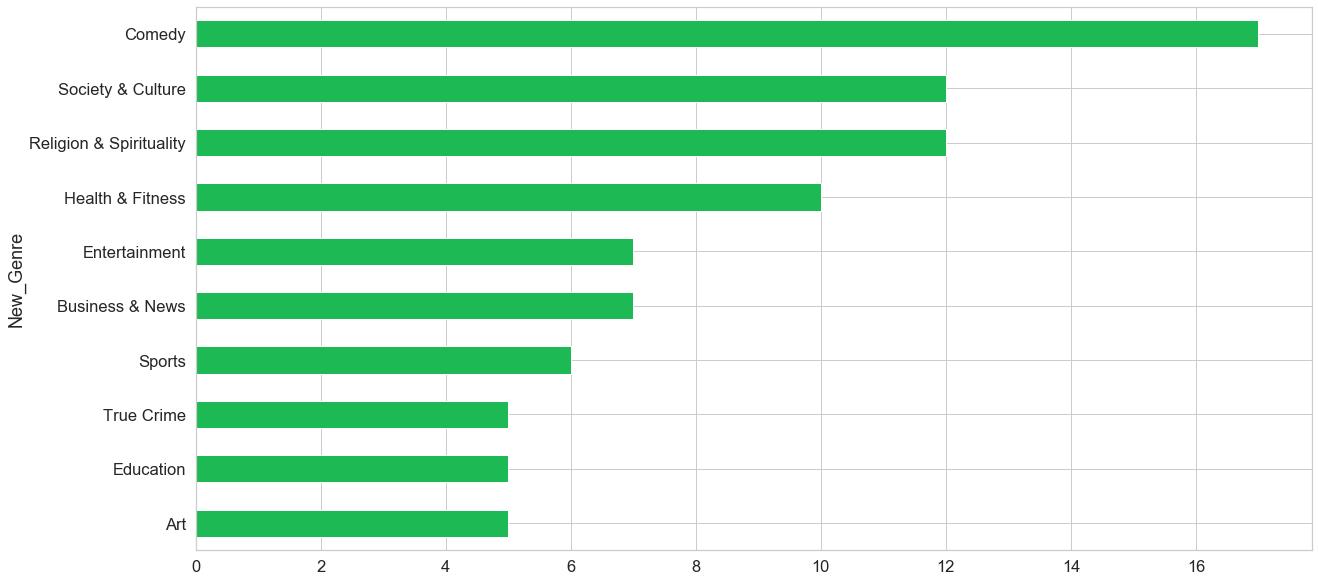

In [52]:
sns.set_palette(colors)

test = data.groupby(['New_Genre'])['New_Genre'].count()

test = test.sort_values(ascending=True)
 
test.plot(kind='barh', stacked=True, legend=False)

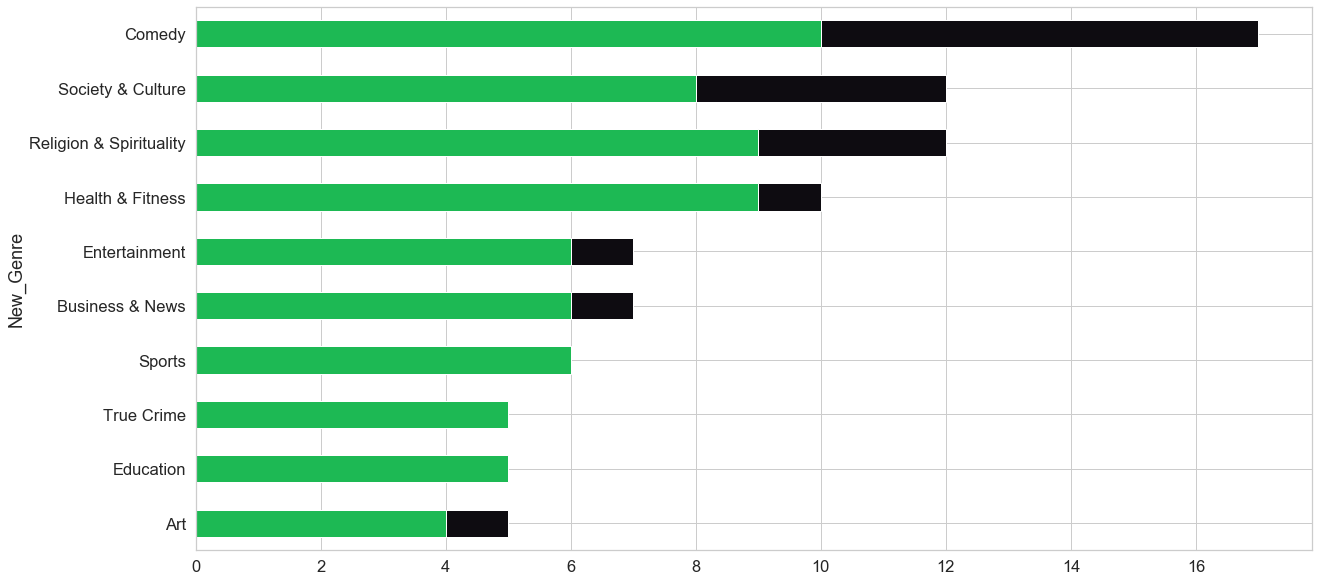

In [53]:
test = data.groupby(['New_Genre', 'Origin'])['New_Genre'].count().unstack('Origin').fillna(0)

test['Total'] = test['Local'] + test['Intl']

test = test.sort_values(by='Total', ascending=True)

test = test[['Intl', 'Local']]

sns.set_palette(colors)

test.plot(kind='barh', stacked=True, legend=False)

In [54]:
df_intl['Genre'].value_counts()

Comedy                     8
Christianity               7
Mental Health              5
True Crime                 5
Society & Culture          4
Basketball                 4
History                    2
Daily News                 2
Alternative Health         2
Sports                     2
Design                     2
Self-Improvement           2
News                       2
Education                  2
Music Commentary           2
Books                      2
Spirituality               1
Philosophy                 1
Science Fiction            1
Religion & Spirituality    1
Entrepreneurship           1
Science                    1
Film Interviews            1
Relationships              1
Management                 1
Music                      1
Business                   1
Comedy Interviews          1
Health & Fitness           1
TV & Film                  1
Improv                     1
Name: Genre, dtype: int64

In [31]:
df_local = data[data['Origin'] == 'Local']
df_intl = data[data['Origin'] == 'Intl']

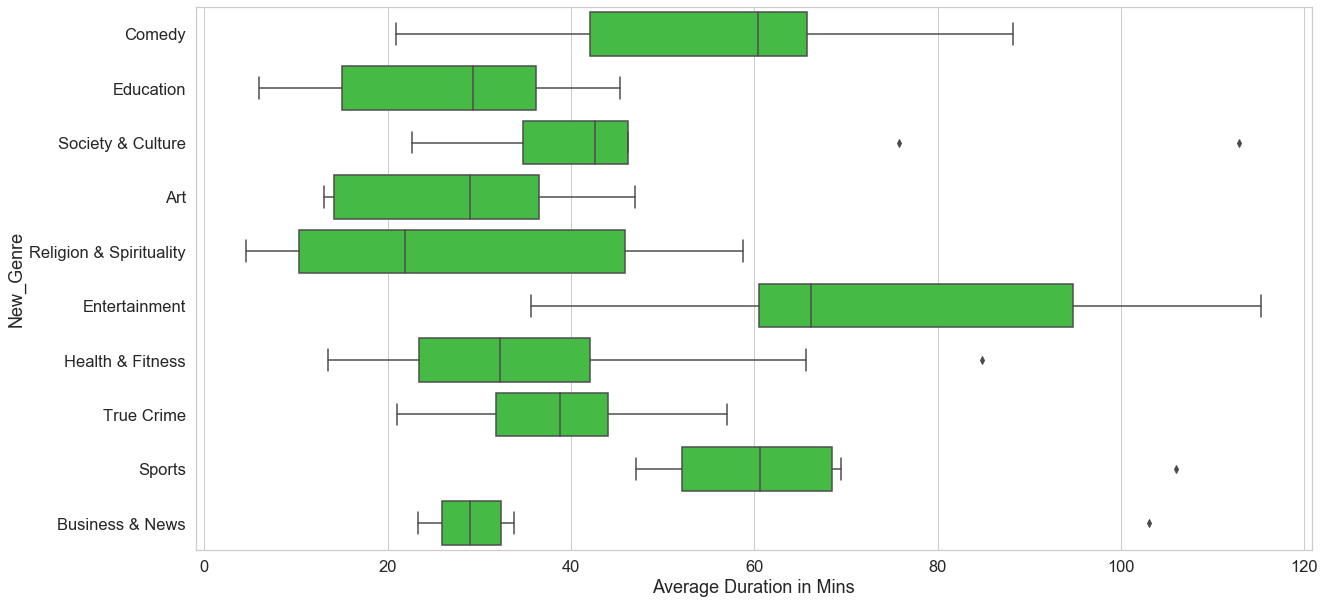

In [47]:
sns.boxplot(x='Average Duration in Mins', y='New_Genre', data=data, color='limegreen')

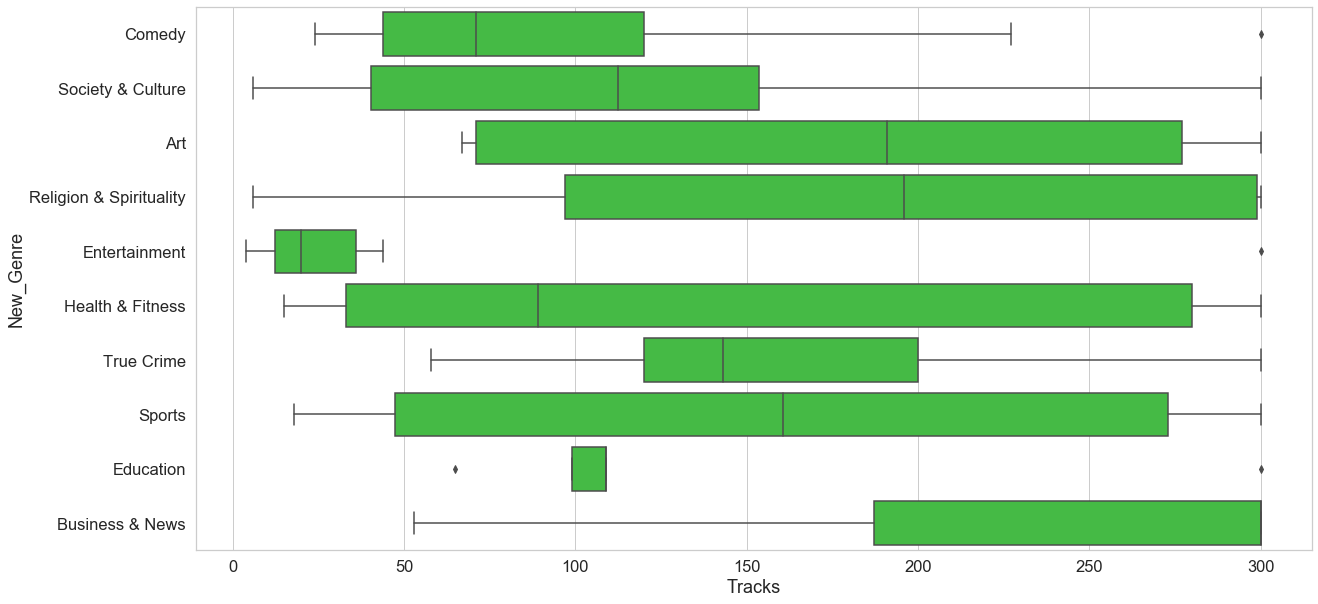

In [55]:
sns.boxplot(x='Tracks', y='New_Genre', data=data, color='limegreen')

In [56]:
data.describe()

,ID,Tracks,Average Duration in Mins,Rank
count,8.600000e+01,86.000000,86.000000,86.000000
mean,1.196534e+09,141.744186,45.023159,43.500000
std,3.833648e+08,107.656446,25.467287,24.969982
min,1.350673e+08,4.000000,4.583333,1.000000
25%,1.078951e+09,45.250000,24.731771,22.250000
50%,1.390479e+09,109.500000,42.042708,43.500000
75%,1.458250e+09,265.500000,60.436979,64.750000
max,1.496690e+09,300.000000,115.258333,86.000000


In [61]:
col = ['ID', 'Tracks', 'Advisory Rating', 'New_Genre', 'Origin', 'Average Duration in Mins', 'Rank']
df = data[col]

In [64]:
le = preprocessing.LabelEncoder()
le.fit(df['New_Genre'])
le.classes_
df['Transformed_Genre'] = le.transform((df['New_Genre']))
genre = dict(zip(le.transform(le.classes_), le.classes_))

le = preprocessing.LabelEncoder()
le.fit(df['Origin'])
le.classes_
df['Transformed_Origin'] = le.transform((df['Origin']))
origin = dict(zip(le.transform(le.classes_), le.classes_))

dummy = pd.get_dummies(df['Advisory Rating'])
df['Transformed_Rating'] = dummy['Clean']

C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lhen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [96]:
col = ['ID', 'Tracks', 'Average Duration in Mins', 'Transformed_Genre',
       'Transformed_Origin', 'Transformed_Rating', 'Rank']
df_dummified = df[col]

X = df_dummified

# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=4, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [97]:
podding = new_data
podding['Genre'] = podding['Transformed_Genre'].map(genre)
podding['Origin'] =  podding['Transformed_Origin'].map(origin)

In [99]:
cluster_0 = podding[podding['labels'] == 0]
cluster_1 = podding[podding['labels'] == 1]
cluster_2 = podding[podding['labels'] == 2]
cluster_3 = podding[podding['labels'] == 3]

In [101]:
cluster_0.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,1.800000e+01,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.0
mean,1.142575e+09,216.500000,44.439699,5.722222,0.0,0.611111,43.333333,0.0
std,8.066885e+07,83.982666,25.472634,2.696524,0.0,0.501631,18.979865,0.0
min,1.033049e+09,58.000000,5.156250,1.000000,0.0,0.000000,11.000000,0.0
25%,1.070945e+09,145.500000,27.356250,3.500000,0.0,0.000000,29.500000,0.0
50%,1.122056e+09,230.000000,39.615625,6.000000,0.0,1.000000,45.500000,0.0
75%,1.207276e+09,300.000000,55.818229,8.000000,0.0,1.000000,57.250000,0.0
max,1.264843e+09,300.000000,106.020833,9.000000,0.0,1.000000,75.000000,0.0


In [102]:
cluster_1.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,2.813891e+08,224.777778,40.381250,3.444444,0.111111,0.888889,44.777778,1.0
std,1.365680e+08,107.837584,23.239924,2.920236,0.333333,0.333333,32.143342,0.0
min,1.350673e+08,53.000000,14.106250,0.000000,0.000000,0.000000,1.000000,1.0
25%,1.512303e+08,97.000000,24.550000,1.000000,0.000000,1.000000,9.000000,1.0
50%,2.789814e+08,299.000000,36.564583,4.000000,0.000000,1.000000,55.000000,1.0
75%,3.989642e+08,300.000000,43.658333,6.000000,0.000000,1.000000,65.000000,1.0
max,4.440831e+08,300.000000,91.147917,7.000000,1.000000,1.000000,82.000000,1.0


In [103]:
cluster_2.describe()

,ID,Tracks,Average Duration in Mins,Transformed_Genre,Transformed_Origin,Transformed_Rating,Rank,labels
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,1.435244e+09,96.057692,47.158734,4.192308,0.307692,0.711538,44.615385,2.0
std,4.926134e+07,87.448004,26.602577,2.520803,0.466041,0.457467,26.764883,0.0
min,1.317416e+09,4.000000,4.583333,0.000000,0.000000,0.000000,3.000000,2.0
25%,1.412980e+09,26.750000,26.580208,2.000000,0.000000,0.000000,21.750000,2.0
50%,1.449005e+09,69.000000,45.050000,4.000000,0.000000,1.000000,43.500000,2.0
75%,1.472184e+09,122.250000,62.518229,6.250000,1.000000,1.000000,69.500000,2.0
max,1.496690e+09,300.000000,115.258333,9.000000,1.000000,1.000000,86.000000,2.0


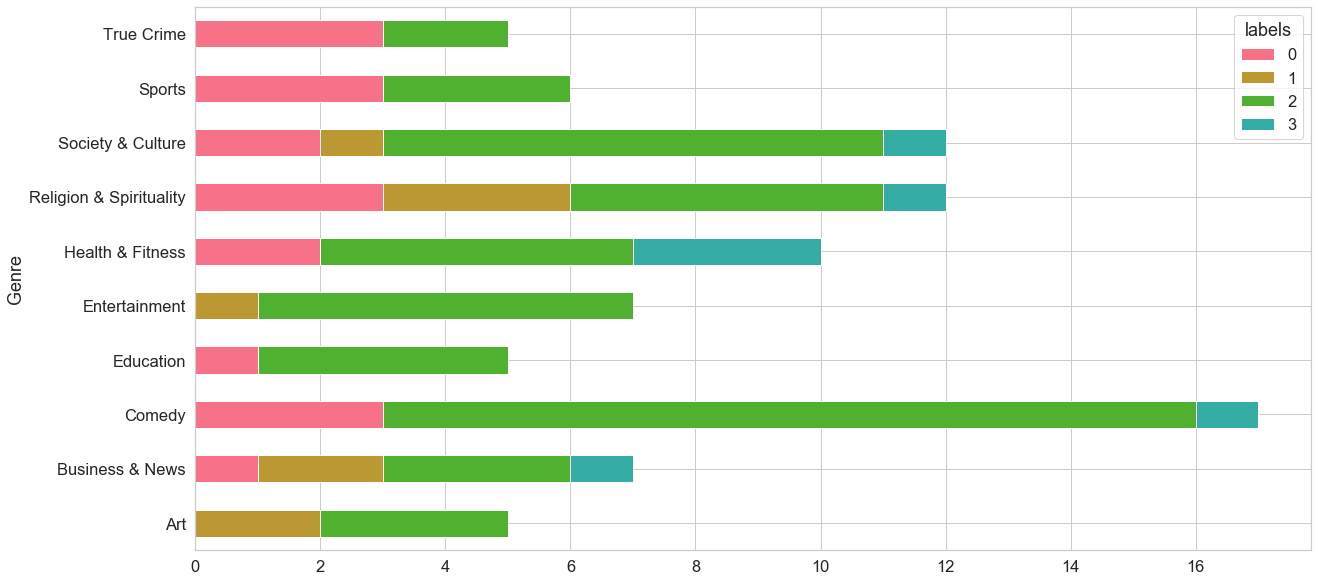

In [107]:
test = podding.groupby(['Genre', 'labels'])['Genre'].count().unstack('labels').fillna(0)

sns.set_palette('husl')

test.plot(kind='barh', stacked=True)

In [112]:
df_local = podding[podding['Origin'] == 'Local']

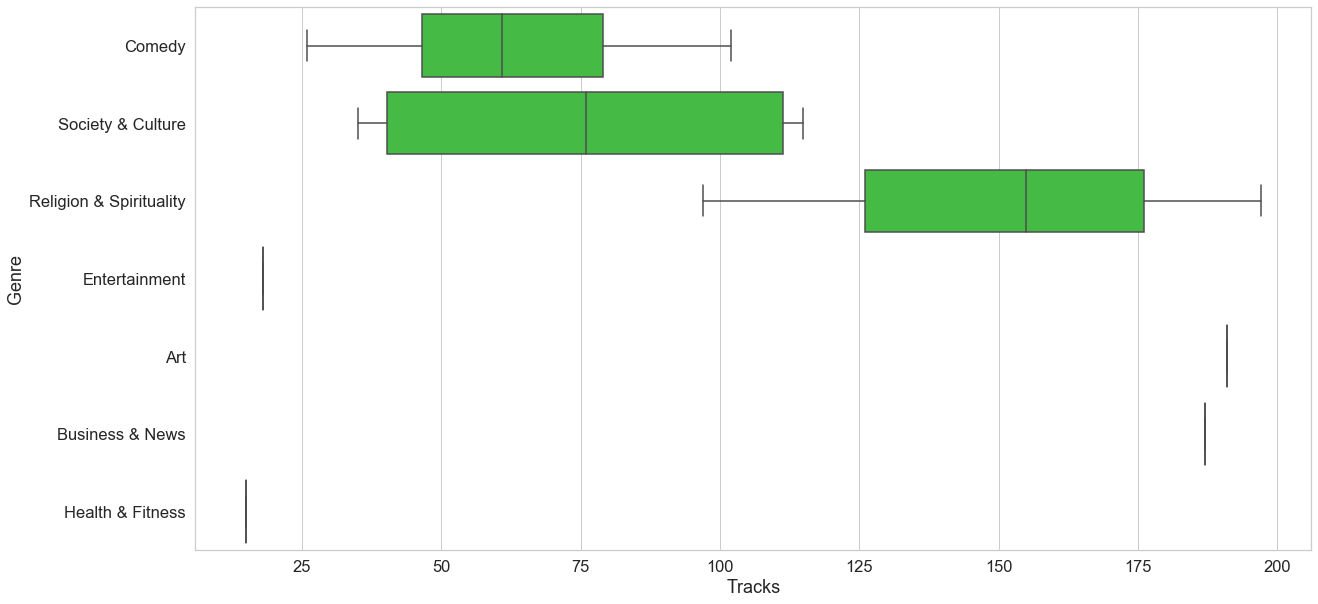

In [114]:
sns.boxplot(x='Tracks', y='Genre', data=df_local, color='limegreen')

In [118]:
df_dummified.columns

Index(['ID', 'Tracks', 'Average Duration in Mins', 'Transformed_Genre',
       'Transformed_Origin', 'Transformed_Rating', 'Rank'],
      dtype='object')

In [122]:
features = ['Tracks', 'Average Duration in Mins', 'Transformed_Genre',
       'Transformed_Origin', 'Transformed_Rating']

X = df_dummified[features]

y = df_dummified['Rank']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [124]:
model = LinearRegression() 

In [125]:
model.fit(X_train, y_train)

coefficient = model.coef_

intercept = model.intercept_

In [126]:
coefficient

array([-3.54734943e-03, -1.63511429e-03,  1.80770979e+00,  2.65496337e+01,
        2.22070977e+00])

In [127]:
intercept

27.30446419747811

In [128]:
model.score(X_test, y_test)

-0.2039324247385903

In [129]:
y_predicted = model.predict(X_test)

In [132]:
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])
coefficients_pd

,Features,Coefficients
0,Tracks,-3.547349
1,Average Duration in Mins,-1.635114
2,Transformed_Genre,1807.709790
3,Transformed_Origin,26549.633678
4,Transformed_Rating,2220.709771


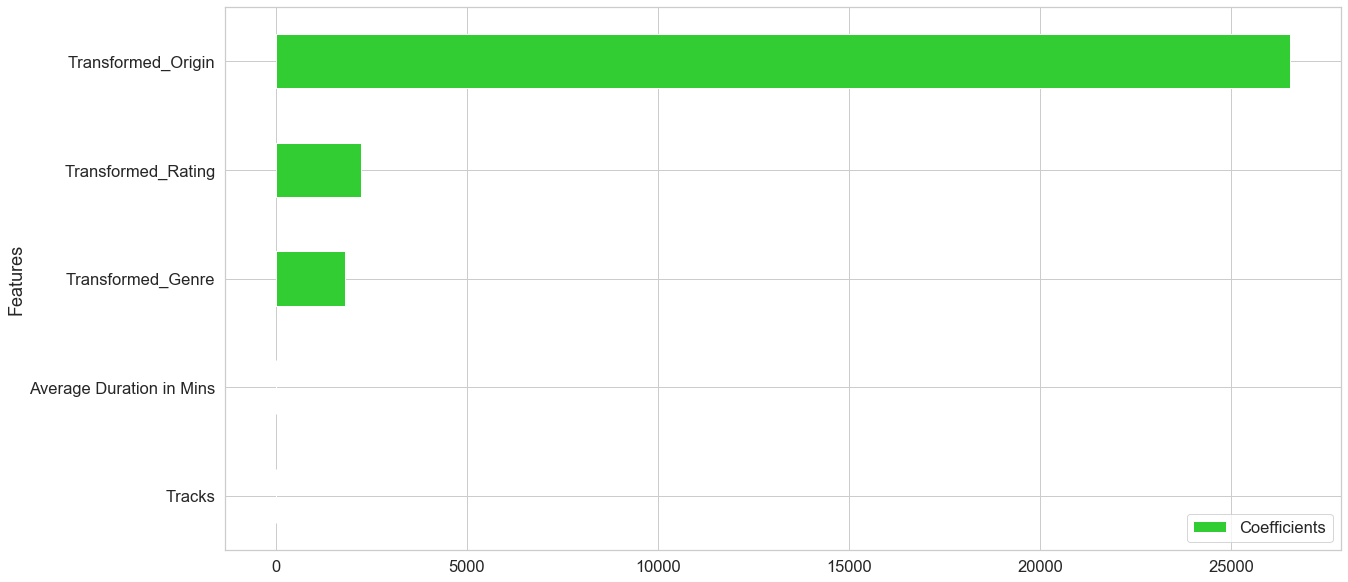

In [137]:
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'limegreen')

In [135]:
new_data = [[150, 20.56, 2, 0, 1]]
model.predict(new_data)

array([32.57487318])

In [136]:
podding['Origin'].value_counts()

Intl     68
Local    18
Name: Origin, dtype: int64

In [139]:
data['Theme'].value_counts()

Lifestyle                  13
Religion & Spirituality    12
Crime & Horror             11
Educational                 7
Sports                      6
Comedy                      5
Mental Health               5
News                        5
Stories                     4
Romance                     4
Business                    3
TV & Film                   2
Relaxation                  2
Radio Show                  2
Personal Journals           1
Arts                        1
Fan Culture                 1
Music                       1
Health                      1
Name: Theme, dtype: int64

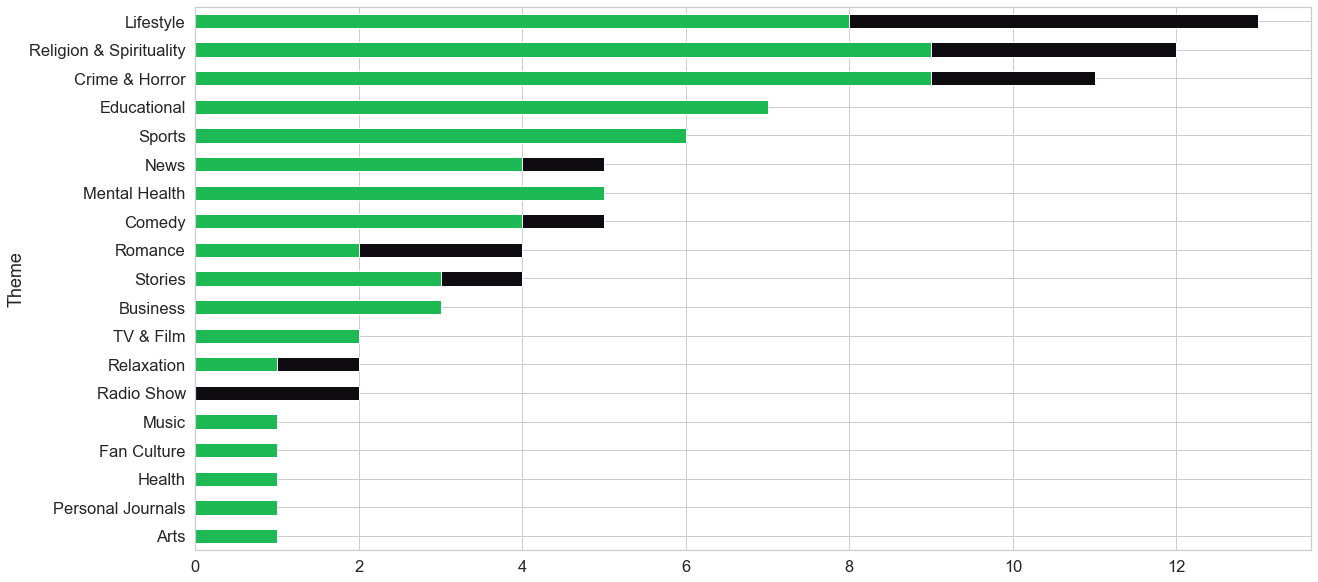

In [140]:
test = data.groupby(['Theme', 'Origin'])['Theme'].count().unstack('Origin').fillna(0)

test['Total'] = test['Local'] + test['Intl']

test = test.sort_values(by='Total', ascending=True)

test = test[['Intl', 'Local']]

sns.set_palette(colors)

test.plot(kind='barh', stacked=True, legend=False)